# Twitter Data Wrangling

## Introduction

This project investigates a dataset that is the archive of tweets from Twitter user : @dog_rates , also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a funny comment about the dog. The plan is to evaluate,clean and visualize the data set to provide in-depth findings on the data

## Table of contents

The tasks involved in this project are:

- #### 1.Data Collection
- #### 2.Data Evaluation
- #### 3.Data Cleaning
- #### 4.Data Storage
- #### 5.Data Analysis and Visualization

## Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import datetime
import os
import json
import matplotlib.pyplot as plt

# 1.Data Collection

## Import  'twitter-archive-enhanced-2.csv' into a dataframe

In [2]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Import 'image-predictions.tsv' into a dataframe

In [5]:
file_name = 'image_predictions.tsv'

if not os.path.isfile(file_name):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)

In [6]:
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [7]:
df_imgpred = pd.read_csv(file_name, sep='\t')

In [8]:
df_imgpred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Import "tweet-json.txt" into a dataframe

In [9]:
df_api = pd.read_json("tweet_json.txt", lines = True)

- ##### Select only the three necessary columns : 'id', 'retweet_count', 'favorite_count'

In [10]:
df_api = df_api.loc[:, ['id', 'retweet_count', 'favorite_count']]

In [11]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# 2.Data Evaluation
## Assessing the 'twitter-archive-enhanced-2.csv' data set

In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_archive.isnull().sum().sum()

11140

##### Quality Issue:
- #### There are some missing values

In [14]:
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

##### Quality issues:
- #### Timestamp is in the wrong data fromat
- #### The tweet_id is of the wrong data type. It should be a string
- #### There are some unnecessary columns

##### Tidiness issue: 
- #### The doggo, floofer, pupper and puppo should be merged into one column

In [15]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
df_archive.name.isnull().sum()

0

##### Quality Issues:
- #### Some names are in lowercase
- #### There is an invalid name 'a'

In [17]:
df_archive.duplicated().sum()

0

In [18]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

##### Quality Issue:
- #### There are some rating denominators that are not the standard limit of 10

## Assessing the 'image-predictions.tsv'  data set

In [19]:
df_imgpred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
df_imgpred.shape

(2075, 12)

##### Quality Issue:
- #### The data set has 2075 entries and the archive tweet data set has 2356 entries

In [21]:
df_imgpred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [22]:
df_imgpred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

##### Quality Issue:
- #### Some column names are vague in description and require renaming

## Assessing the "tweet-json.txt" data set

In [23]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [24]:
df_api.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

##### Quality Issue:
- #### The api dataframe has 2354 entries while the archive data set has 2356 entries

### The quality issues are summarised below:
- There are some missing values
- Timestamp is in the wrong data fromat
- Tweet_id is of the wrong data type. It should be a string
- There are some unnecessary columns
- Some column names are very vague in description
- The first letter of some names are lowercase
- The api dataframe has 2354 entries while the archive data set has 2356 entries(Which means there are some missing values in the retweet and favourite count)
- There are some rating denominators that are more than the standard limit of 10

### The Quality issues observed are:


- The dataframes are scattered and a merge is necessary
- The doggo, floofer, pupper and puppo classifications are unnecessary

# 3.Data Cleaning
- ##### First, merge the data sets into one data frame:

In [25]:
df_api = df_api.rename(columns = {'id' : 'tweet_id'})

#First, rename the column 'id' in df_api dataset and rename it to 'tweet_id'

In [26]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [27]:
raw_df = pd.merge(df_archive, df_imgpred, on = 'tweet_id', how = 'outer')

#Now merging the df_archive and df_imgpred data sets to create the raw_df data set

In [28]:
raw_df = pd.merge(raw_df, df_api, on = 'tweet_id', how = 'outer')

#Now merging the raw_df and df_api data sets

 ##### Make a copy of the data set

In [29]:
new_df = raw_df.copy()

In [30]:
new_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


### Drop unnecessary columns
- ##### Define


Some columns contain unnecessary information and dropping them will enable easier analyzation of the dataframe

In [31]:
new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [32]:
new_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

- ##### The columns to be dropped are:
                              'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                              'retweeted_status_user_id', 'retweeted_status_timestamp',
                              'p1_conf', 'expanded_urls', 'p2_conf', 'p3_conf'

- ##### Code

In [33]:
new_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
             'retweeted_status_user_id', 'retweeted_status_timestamp',
             'p1_conf', 'expanded_urls', 'p2_conf', 'p3_conf'], axis=1, inplace=True)

- ##### Test

In [34]:
new_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

### To convert the classification of dogs into one title:
- ##### Define


- The classification of the dogs has been stored in 4 different columns. It would be more appropriate if the classifications were in one column instead.

- ##### Code

In [35]:
#Code creates a new column for classification an incorporates the data from the 'doggo', 'floofer','pupper', 'puppo' into it
def find_dog_class(val):
    is_doggo = val[0]
    is_floofer = val[1]
    is_pupper = val[2]
    is_puppo = val[3]
    res = ''
    if is_doggo != 'None':
        res += 'doggo '
    if is_floofer != 'None':
        res += 'floofer '
    if is_pupper != 'None':
        res += 'pupper '
    if is_puppo != 'None':
        res += 'puppo '
    return res

new_df['classification'] = new_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(find_dog_class, axis = 1)


In [36]:
new_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog',
       'retweet_count', 'favorite_count', 'classification'],
      dtype='object')

- ##### Now, drop the unnecessary dog classsiication columns

In [37]:
new_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

- ##### Test

In [38]:
new_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_dog',
       'p2', 'p2_dog', 'p3', 'p3_dog', 'retweet_count', 'favorite_count',
       'classification'],
      dtype='object')

### Convert the timestamp to datetime format:
- ##### Define


The timestamp column values are required to be converted to datetime format

In [39]:
new_df.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
rating_numerator        int64
rating_denominator      int64
name                   object
jpg_url                object
img_num               float64
p1                     object
p1_dog                 object
p2                     object
p2_dog                 object
p3                     object
p3_dog                 object
retweet_count         float64
favorite_count        float64
classification         object
dtype: object

- ##### Code

In [40]:
new_df.timestamp = pd.to_datetime(new_df.timestamp)

#Code converts the timestamp column values to datetime data type

- ##### Test

In [41]:
new_df.timestamp.dtypes

datetime64[ns, UTC]

In [42]:
new_df.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
jpg_url                            object
img_num                           float64
p1                                 object
p1_dog                             object
p2                                 object
p2_dog                             object
p3                                 object
p3_dog                             object
retweet_count                     float64
favorite_count                    float64
classification                     object
dtype: object

### Convert the tweet id format from integer to string
- ##### Define


The tweet_id column values are required to be converted to string format

- ##### Code

In [43]:
new_df['tweet_id']= new_df['tweet_id'].astype(str)

#Converts the tweet_id column values to string format

- ##### Test

In [44]:
new_df.tweet_id.dtypes

dtype('O')

### Rename the vague column descriptions
- ##### Define


The columns with vague descritions are to be named to become more understandable

- ##### Code

In [45]:
new_df.rename(columns={'img_num':'number_of_images', 'p1':'prediction_1', 'p1_dog':'prediction_result_1',   
                      'p2':'prediction_2', 'p2_dog':'prediction_result_2', 
                      'p3':'prediction_3', 'p3_dog':'prediction_result_3'}, inplace=True)

#This code renames the columns to new names

- ##### Test

In [46]:
new_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'number_of_images',
       'prediction_1', 'prediction_result_1', 'prediction_2',
       'prediction_result_2', 'prediction_3', 'prediction_result_3',
       'retweet_count', 'favorite_count', 'classification'],
      dtype='object')

### Capitalize the first letters of names in the name column

- ##### Define


- There first letters of the names in the name column are in lowercase letters and are required to have the first letter capitalized

- ##### Code

In [47]:
new_df['name'] = [name.capitalize() for name in new_df['name']]

#Code capitalizes the first letter of the names in the name column

- ##### Test

In [48]:
new_df[['name']].sample(10)

,name
78,None
2118,Damon
757,Penny
1584,None
1657,Brandy
633,Clark
1403,Miley
470,Timber
273,Pipsy
1066,Chip


### Deal with with the missing values:
- ##### Define


- There are some missing values(Nan) that are to be converted to the string 'None'
- The missing values in the retweet_counts and favourite_count are to be converted to the value of zero

- ##### Code

In [49]:
new_df.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
jpg_url                281
number_of_images       281
prediction_1           281
prediction_result_1    281
prediction_2           281
prediction_result_2    281
prediction_3           281
prediction_result_3    281
retweet_count            2
favorite_count           2
classification           0
dtype: int64

In [50]:
new_df[['prediction_1', 'prediction_result_1', 'prediction_2',
        'prediction_result_2','prediction_3', 'prediction_result_3', 'jpg_url',
        'number_of_images', 'classification']]= new_df[['prediction_1', 'prediction_result_1', 
                                                        'prediction_2', 'prediction_result_2', 'prediction_3', 
                                                        'prediction_result_3', 'jpg_url', 'number_of_images', 
                                                        'classification' ]].fillna('None')

# This code converts the 'Nan' values to the string 'None'

In [51]:
new_df[['retweet_count', 'favorite_count']] = new_df[['retweet_count', 'favorite_count']].fillna(0)

#This code converts the 'Nan' values to the integer value of 0

- ##### Test

In [52]:
new_df.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
rating_numerator       0
rating_denominator     0
name                   0
jpg_url                0
number_of_images       0
prediction_1           0
prediction_result_1    0
prediction_2           0
prediction_result_2    0
prediction_3           0
prediction_result_3    0
retweet_count          0
favorite_count         0
classification         0
dtype: int64

- There are now no missing or Nan Values

 ### Convert the invalid name 'A' to something more valid
- ##### Define


The invalid name 'A' is converted to a more valid string 'None' since the names of these dogs are not given in the 'twitter-archive-enhanced-2.csv' dataset

- ##### Code

In [53]:
new_df.loc[new_df['name'] == 'A', 'name']= 'None'

#This converts all the names 'A' in the name column to the string 'Unknown'

- ##### Test 

In [54]:
new_df.loc[new_df['name'] == 'A']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,number_of_images,prediction_1,prediction_result_1,prediction_2,prediction_result_2,prediction_3,prediction_result_3,retweet_count,favorite_count,classification


### Make all the rating denominators equal to 10
- ##### Define

Some of the rating denoinators are not the standard value of 10. They need to be converted to the standard value

- ##### Code

In [55]:
new_df.loc[new_df['rating_denominator'] !=10, 'rating_denominator' ] = 10

#This code converts all the denominators not equalto 10 to the standard value

- ##### Test

In [56]:
new_df.rating_denominator.value_counts()


10    2356
Name: rating_denominator, dtype: int64

### Create a new column for rating
- ##### Define



A new column for rating will simplify further analysation and visualisation

- ##### Code

In [57]:
new_df['rating'] = new_df.rating_numerator / new_df.rating_denominator

- ##### Test

In [58]:
new_df.rating.value_counts()

1.2      558
1.1      464
1.0      461
1.3      351
0.9      158
0.8      102
0.7       55
1.4       54
0.5       37
0.6       32
0.3       19
0.4       17
0.2        9
0.1        9
7.5        2
1.5        2
42.0       2
0.0        2
8.0        1
14.4       1
1.7        1
2.6        1
2.0        1
12.1       1
14.3       1
4.4        1
6.0        1
4.5        1
5.0        1
9.9        1
20.4       1
177.6      1
16.5       1
66.6       1
2.7        1
18.2       1
2.4        1
96.0       1
8.4        1
8.8        1
Name: rating, dtype: int64

### Rearrange the Data set to bring together columns with data that is related

In [59]:
column_names = ['tweet_id', 'name', 'classification', 'rating_numerator', 'rating_denominator', 
                'retweet_count', 'favorite_count', 'rating', 'timestamp', 'source', 'text', 'jpg_url',
                'number_of_images', 'prediction_1', 'prediction_result_1', 'prediction_2',
                'prediction_result_2', 'prediction_3', 'prediction_result_3']

new_df = new_df.reindex(columns=column_names)

#This rearranges the column to a more desired arrangement

In [60]:
new_df.head(1)

,tweet_id,name,classification,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,timestamp,source,text,jpg_url,number_of_images,prediction_1,prediction_result_1,prediction_2,prediction_result_2,prediction_3,prediction_result_3
0,892420643555336193,Phineas,,13,10,8853.0,39467.0,1.3,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,False,bagel,False,banana,False


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2356 non-null   object             
 1   name                 2356 non-null   object             
 2   classification       2356 non-null   object             
 3   rating_numerator     2356 non-null   int64              
 4   rating_denominator   2356 non-null   int64              
 5   retweet_count        2356 non-null   float64            
 6   favorite_count       2356 non-null   float64            
 7   rating               2356 non-null   float64            
 8   timestamp            2356 non-null   datetime64[ns, UTC]
 9   source               2356 non-null   object             
 10  text                 2356 non-null   object             
 11  jpg_url              2356 non-null   object             
 12  number_of_images    

- ##### The Data Set is now clean and ready for Storage

# 4.Data Storage

- ##### The data is stored in a csv file to preserve the cleaning opeations undertaken on it

In [62]:
new_df.to_csv('twitter_archive_master.csv', index=False)

# 5.Data Analysis and Visualisation

### Determine the top 10 most popular dog names 

 ##### Use the plot() function

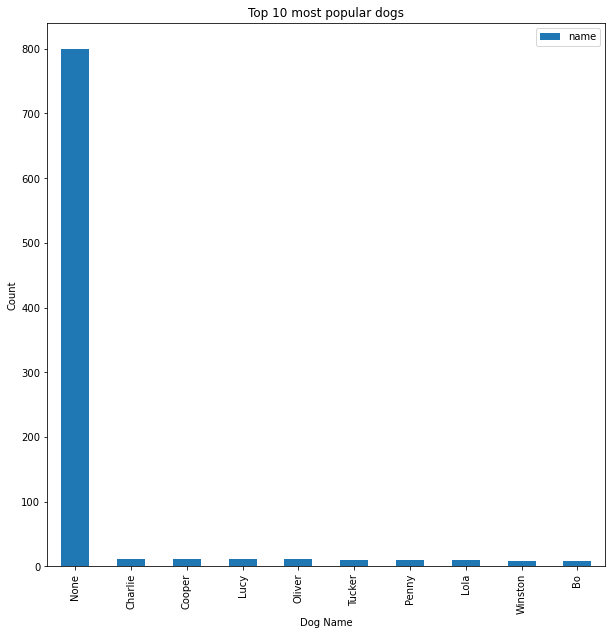

In [63]:

#This plots the frequancy of the dog names in the dataset 
plt.subplots(1, figsize=(10, 10))
new_df['name'].value_counts().sort_values(ascending=False)[0:10].plot(kind = 'bar')

#Set the axis title,legend and x & y axis labels
plt.title('Top 10 most popular dogs')
plt.ylabel('Count')
plt.xlabel('Dog Name')
plt.legend()

- ##### Missing names make the most part of this data set. To get the most popular names, I will exclude the unknown names on the bar graph

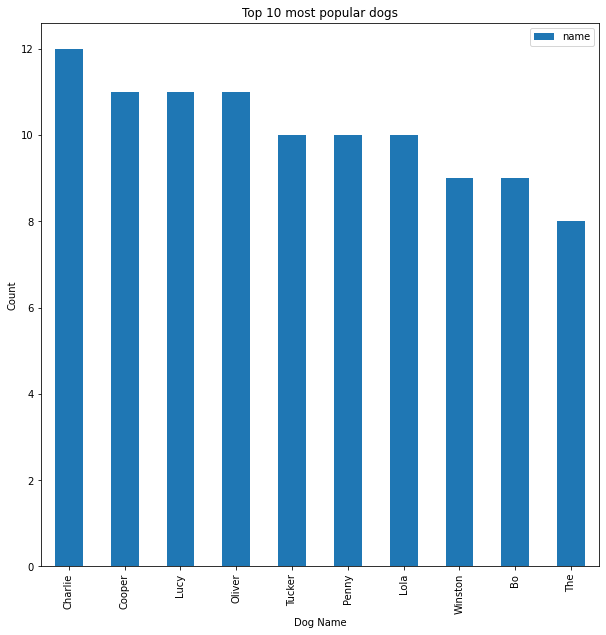

In [64]:
#This plots the frequancy of the dog names in the dataset excluding the unknown names
plt.subplots(1, figsize=(10, 10))
new_df['name'].value_counts().sort_values(ascending=False)[1:11].plot(kind = 'bar')

#Set the axis title,legend and x & y axis labels
plt.title('Top 10 most popular dogs')
plt.ylabel('Count')
plt.xlabel('Dog Name')
plt.legend()

##This saves the plot image to memory
plt.savefig('dog_names')


### Determine the dogs with the most likes and retweets

- ##### To determine the dog with the most likes

In [65]:
new_df[new_df['favorite_count'] == new_df['favorite_count'].max()]

#This code selects the data of the dog with the most likes in the dataframe

,tweet_id,name,classification,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,timestamp,source,text,jpg_url,number_of_images,prediction_1,prediction_result_1,prediction_2,prediction_result_2,prediction_3,prediction_result_3
413,822872901745569793,None,puppo,13,10,48265.0,132810.0,1.3,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,True,Labrador_retriever,True,Irish_terrier,True


In [66]:
new_df.query('tweet_id == "822872901745569793"').text.tolist()

#Brings the tweet text into a list

["Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"]

- ##### To determine the dog with the most retweets

In [67]:
new_df[new_df['retweet_count'] == new_df['retweet_count'].max()]

#This code selects the data of the dog with the most retweets in the dataframe

,tweet_id,name,classification,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,timestamp,source,text,jpg_url,number_of_images,prediction_1,prediction_result_1,prediction_2,prediction_result_2,prediction_3,prediction_result_3
1039,744234799360020481,None,doggo,13,10,79515.0,131075.0,1.3,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,True,ice_bear,False,whippet,True


In [68]:
new_df.query('tweet_id == "744234799360020481"').text.tolist()

#Brings the tweet text into a list

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]

### Determine the trend of likes and retweets over time

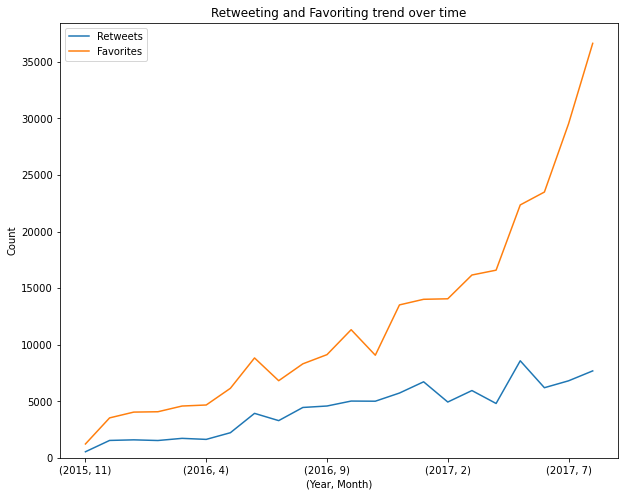

In [69]:
plt.subplots(1, sharex=True, figsize=(10,8))
#First group the retweet and favorite count by the timestamp using groupby() function
new_df.retweet_count.groupby([new_df["timestamp"].dt.year, new_df["timestamp"].dt.month]).mean().plot(kind='line')
new_df.favorite_count.groupby([new_df["timestamp"].dt.year, new_df["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
#Set the axis title,legend and x & y axis labels
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))

#This saves the plot image to memory
plt.savefig('like_retweet')


### Determine the most and least common dog classification

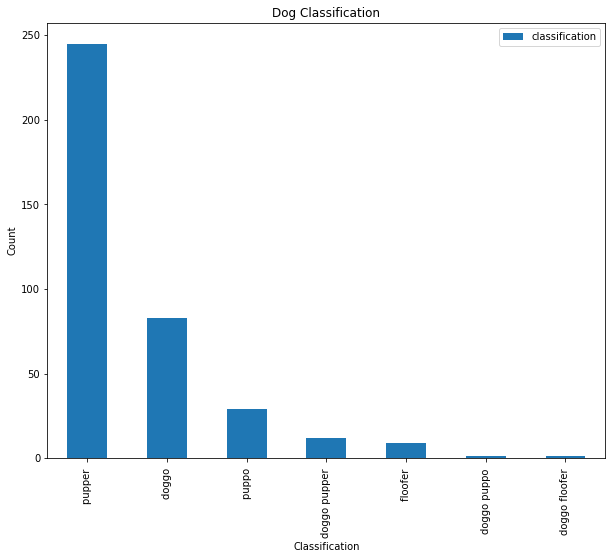

In [75]:
#Plots the dog classification frequency in the data drame
plt.subplots(1, figsize=(10,8))
new_df['classification'].value_counts().sort_values(ascending=0)[1:].plot(kind = 'bar') 

#Set the axis title,legend and x & y axis labels
plt.title('Dog Classification')
plt.ylabel('Count')
plt.xlabel('Classification')
plt.legend()

#This saves the plot image to memory
plt.savefig('dog_class')
